In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [48]:
df = pd.read_csv('car_prediction_data.csv')

In [49]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [50]:
df.shape

(301, 9)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [52]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [53]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [54]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [55]:
df['Fuel_Type'] = df['Fuel_Type'].replace(('Petrol','Diesel','CNG'),(0,1,2))
df['Seller_Type'] = df['Seller_Type'].replace(('Dealer','Individual'),(0,1))
df['Transmission'] = df['Transmission'].replace(('Manual','Automatic'),(0,1))

In [56]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [57]:
x = df.drop(['Selling_Price','Car_Name'],axis=1)
y = df['Selling_Price']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
pred_train = lr.predict(x_train)

In [62]:
r2_score(y_train,pred_train)

0.8787289819887423

In [63]:
mean_absolute_error(y_train,pred_train)

1.179226708544842

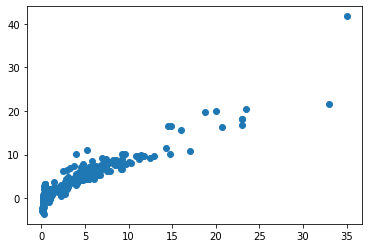

In [64]:
plt.scatter(y_train,pred_train)

In [65]:
pred_test = lr.predict(x_test)
r2_score(y_test,pred_test)

0.8735518306725523

In [66]:
mean_absolute_error(y_test,pred_test)

1.1377083714155032

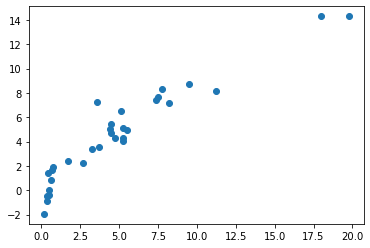

In [67]:
plt.scatter(y_test,pred_test)

In [68]:
lasso = Lasso()

In [69]:
lasso.fit(x_train,y_train)

Lasso()

In [70]:
pred_train = lasso.predict(x_train)

In [71]:
r2_score(y_train,pred_train)

0.8433838202800135

In [72]:
pred_test = lasso.predict(x_test)
r2_score(y_test,pred_test)

0.8229445127489551

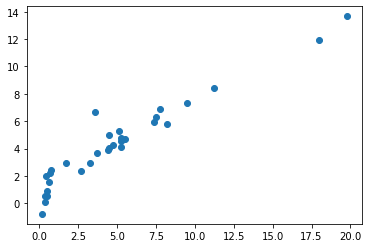

In [73]:
plt.scatter(y_test,pred_test)

In [74]:
tree = DecisionTreeRegressor()

In [75]:
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [76]:
r2_score(y_test, tree.predict(x_test))

0.9612855881262772

In [77]:
forest = RandomForestRegressor()

In [78]:
forest.fit(x_train,y_train)

RandomForestRegressor()

In [79]:
r2_score(y_test, forest.predict(x_test))

0.936792566450302